      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

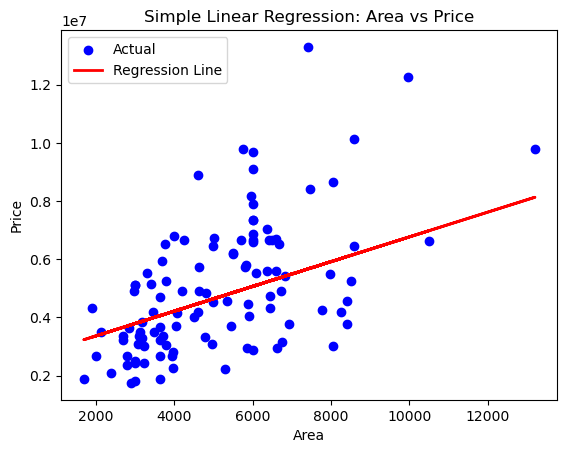


Multiple Linear Regression
MAE: 970043.403920164
MSE: 1754318687330.6643
R² Score: 0.6529242642153184

Model Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load the dataset
df = pd.read_csv("Housing.csv")
# Display first 5 rows
print(df.head())
# Check for null values
print(df.isnull().sum())
# Encode categorical variable 'furnishingstatus'
df = pd.get_dummies(df, drop_first=True)
# Simple Linear Regression: area vs price
X_simple = df[['area']]
y = df['price']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
# Predict
y_pred_s = model_simple.predict(X_test_s)
# Evaluation
print("Simple Linear Regression")
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()
# Features and target
X = df.drop('price', axis=1)
y = df['price']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
# Predict
y_pred = model_multi.predict(X_test)
# Evaluation
print("\nMultiple Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
# Coefficients
coef_df = pd.DataFrame(model_multi.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coef_df)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

# ✅ Load Breast Cancer Dataset (binary classification)
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# ✅ Features and target
X = df.drop('target', axis=1)
y = df['target']

# ✅ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Logistic Regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# ✅ Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ✅ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ✅ Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x_vals = np.linspace(-10, 10, 100)
plt.plot(x_vals, sigmoid(x_vals))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()

# ✅ Threshold Tuning Example
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)
print(f"Classification Report (Threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_thresh))
